In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast


In [2]:
df = pd.read_csv("zomato_restaurants_in_India.csv")

In [3]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 no

In [4]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             res_id        city_id       latitude      longitude  country_id  \
count  2.119440e+05  211944.000000  211944.000000  211944.000000    211944.0   
mean   1.349411e+07    4746.785434      21.499758      77.615276         1.0   
std    7.883722e+06    5568.766386      22.781331       7.500104         0.0   
min    5.000000e+01       1.000000       0.000000       0.000000         1.0   
25%    3.301027e+06      11.000000      15.496071      74.877961         1.0   
50%    1.869573e+07      34.000000      22.514494      77.425971         1.0   
75%    1.881297e+07   11306.000000      26.841667      80.219323         1.0   
max    1.915979e+07   11354.000000   10000.000000      91.832769         1.0   

       average_cost_for_two    price_range  aggregate_rating          votes  \
count         211944.000000  211944.000000     211944.000000  211944.000000   
mean             595.812229       1.882535          3.395937     378.001864   
std              606.

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64


In [6]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].fillna(df[column].mean())

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

In [8]:
print("\nMissing Values After:")
print(df.isnull().sum())


Missing Values After:
res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64


In [9]:
df['establishment'] = df['establishment'].apply(lambda x: x.strip("[]'"))
df = df.drop('currency', axis=1)
df['opentable_support'] = df['opentable_support'].apply(lambda x: 0 if x == 0.0 else x)
if df['opentable_support'].nunique() == 1 and df['opentable_support'].unique()[0] == 0:
    df = df.drop('opentable_support', axis=1)
df['delivery'] = df['delivery'].replace({-1: 'Unavailable', 1: 'Available'})
df['takeaway'] = df['takeaway'].replace({-1: 'Unavailable', 1: 'Available'})
df = df.drop('locality_verbose', axis = 1)
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,8:30am – 10:30pm (Mon-Sun),700,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,Unavailable,Unavailable
1,3400005,Mama Chicken Mama Franky House,Quick Bites,https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,"12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,Unavailable,Unavailable
2,3401013,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,9:30 AM to 11 PM,300,1,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,Available,Unavailable
3,3400290,Bhagat Halwai,Quick Bites,https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,8am – 11pm (Mon-Sun),300,1,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,Available,Unavailable
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,11:30 AM to 11:30 PM,1000,3,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,Available,Unavailable


In [10]:
central_tendency_dispersion = df.describe()

print("Central Tendency and Dispersion:")
print(central_tendency_dispersion)

Central Tendency and Dispersion:
             res_id        city_id       latitude      longitude  country_id  \
count  2.119440e+05  211944.000000  211944.000000  211944.000000    211944.0   
mean   1.349411e+07    4746.785434      21.499758      77.615276         1.0   
std    7.883722e+06    5568.766386      22.781331       7.500104         0.0   
min    5.000000e+01       1.000000       0.000000       0.000000         1.0   
25%    3.301027e+06      11.000000      15.496071      74.877961         1.0   
50%    1.869573e+07      34.000000      22.514494      77.425971         1.0   
75%    1.881297e+07   11306.000000      26.841667      80.219323         1.0   
max    1.915979e+07   11354.000000   10000.000000      91.832769         1.0   

       average_cost_for_two    price_range  aggregate_rating          votes  \
count         211944.000000  211944.000000     211944.000000  211944.000000   
mean             595.812229       1.882535          3.395937     378.001864   
std      

In [11]:
mode_values = df.mode().iloc[0]  
print("\nMode for each column:")
print(mode_values)


Mode for each column:
res_id                                                           18631911
name                                                       Domino's Pizza
establishment                                                 Quick Bites
url                     https://www.zomato.com/chennai/3bs-buddies-bar...
address                                  Laxman Jhula, Tapovan, Rishikesh
city                                                              Chennai
city_id                                                                 7
locality                                                      Civil Lines
latitude                                                              0.0
longitude                                                             0.0
zipcode                                                                 0
country_id                                                              1
cuisines                                                     North Indian
timings        

In [12]:
variance = df.select_dtypes(include=['number']).var()
print("\nVariance for numerical columns:")
print(variance)


Variance for numerical columns:
res_id                  6.215307e+13
city_id                 3.101116e+07
latitude                5.189890e+02
longitude               5.625156e+01
country_id              0.000000e+00
average_cost_for_two    3.675262e+05
price_range             7.974295e-01
aggregate_rating        1.647737e+00
votes                   8.562418e+05
photo_count             7.528494e+05
dtype: float64


In [13]:
skewness = df.select_dtypes(include=['number']).skew()
print("\nSkewness for numerical columns:")
print(skewness)


Skewness for numerical columns:
res_id                   -0.858265
city_id                   0.328276
latitude                396.489877
longitude                -6.709975
country_id                0.000000
average_cost_for_two      5.491744
price_range               0.732229
aggregate_rating         -1.911960
votes                    10.989821
photo_count               8.134456
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


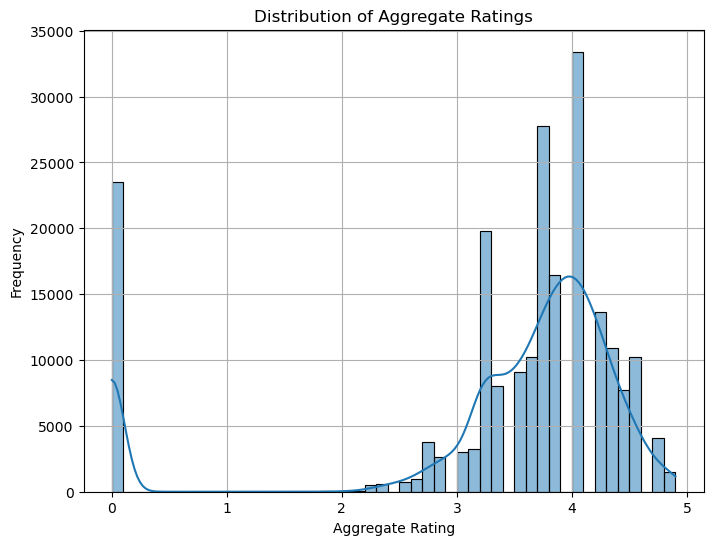

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['aggregate_rating'], kde=True, binwidth=0.1)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


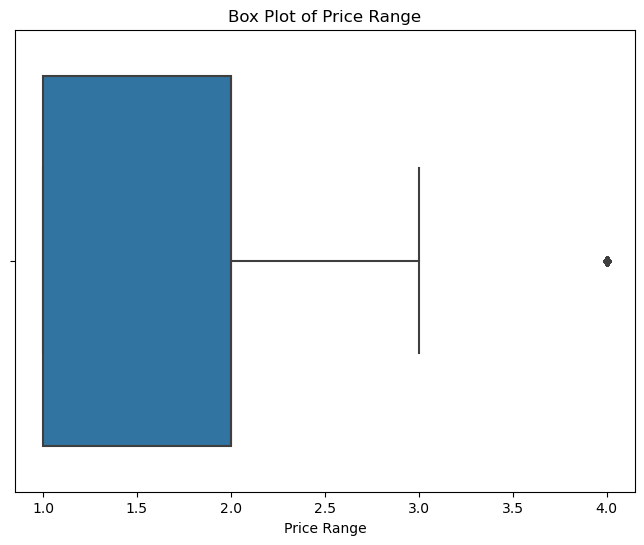

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price_range'])
plt.title('Box Plot of Price Range')
plt.xlabel('Price Range')
plt.show()

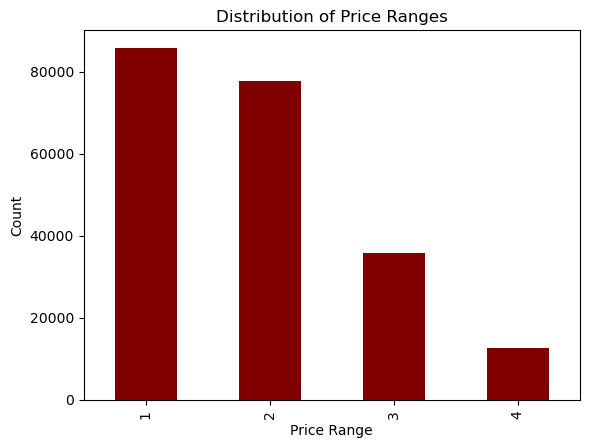

In [16]:
price_range_counts = df['price_range'].value_counts()

price_range_counts.plot(kind='bar', color='maroon')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Ranges')
plt.show()

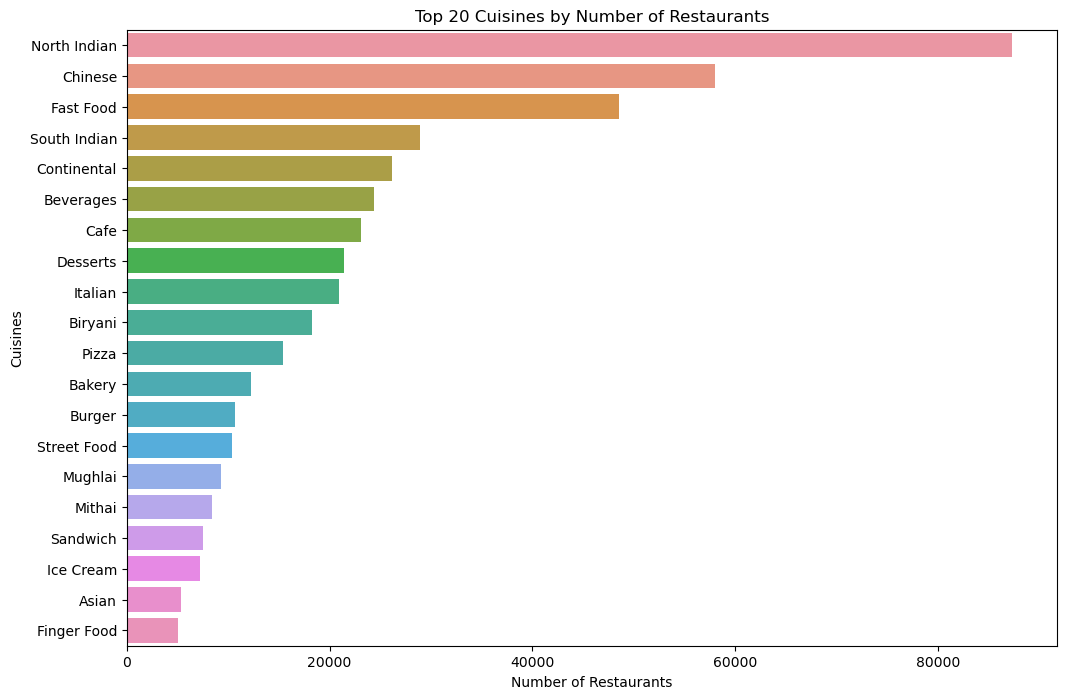

In [17]:
df['cuisines'] = df['cuisines'].str.split(', ')
cuisines_expanded = df.explode('cuisines')
plt.figure(figsize=(12, 8))
cuisine_counts = cuisines_expanded['cuisines'].value_counts().nlargest(20)  
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index)
plt.title('Top 20 Cuisines by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


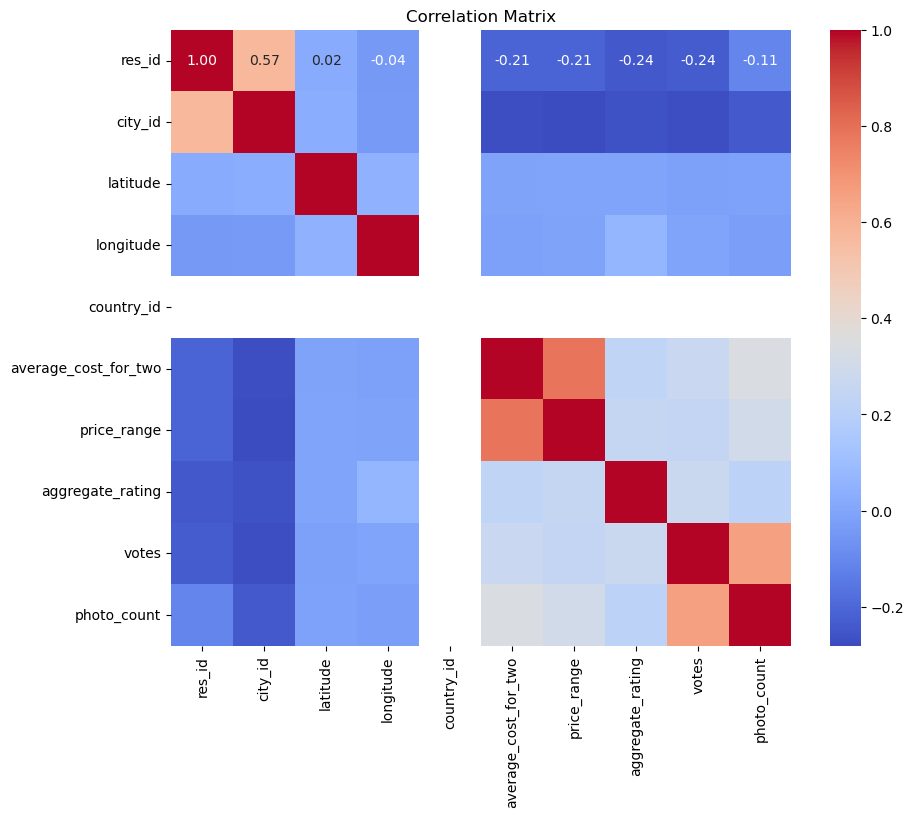

In [18]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [19]:
city_counts = df['city'].value_counts()
print(city_counts)

city
Chennai          11630
Mumbai            6497
Bangalore         4971
Pune              4217
Lucknow           4121
                 ...  
Ghaziabad          132
Faridabad          124
Howrah              66
Greater Noida       33
Nayagaon            17
Name: count, Length: 99, dtype: int64


In [20]:
average_ratings = df.groupby('city')['aggregate_rating'].mean()
print(average_ratings)

city
Agra          3.493860
Ahmedabad     3.813978
Ajmer         3.554623
Alappuzha     0.858842
Allahabad     3.485248
                ...   
Varanasi      3.667730
Vellore       2.987788
Vijayawada    3.618026
Vizag         3.640094
Zirakpur      3.236576
Name: aggregate_rating, Length: 99, dtype: float64


In [21]:
price_distribution = df.groupby(['city', 'price_range']).size().unstack(fill_value=0)
print(price_distribution)

price_range     1     2    3    4
city                             
Agra         1035   898  390  299
Ahmedabad     666  1314  964  218
Ajmer        1931  1177  167    2
Alappuzha    1014   772  133   15
Allahabad     470   774  725  146
...           ...   ...  ...  ...
Varanasi      402   796  955  261
Vellore      1506   557   86   21
Vijayawada    777  1149  192   40
Vizag         762  1152  334   99
Zirakpur      108    89   42   18

[99 rows x 4 columns]


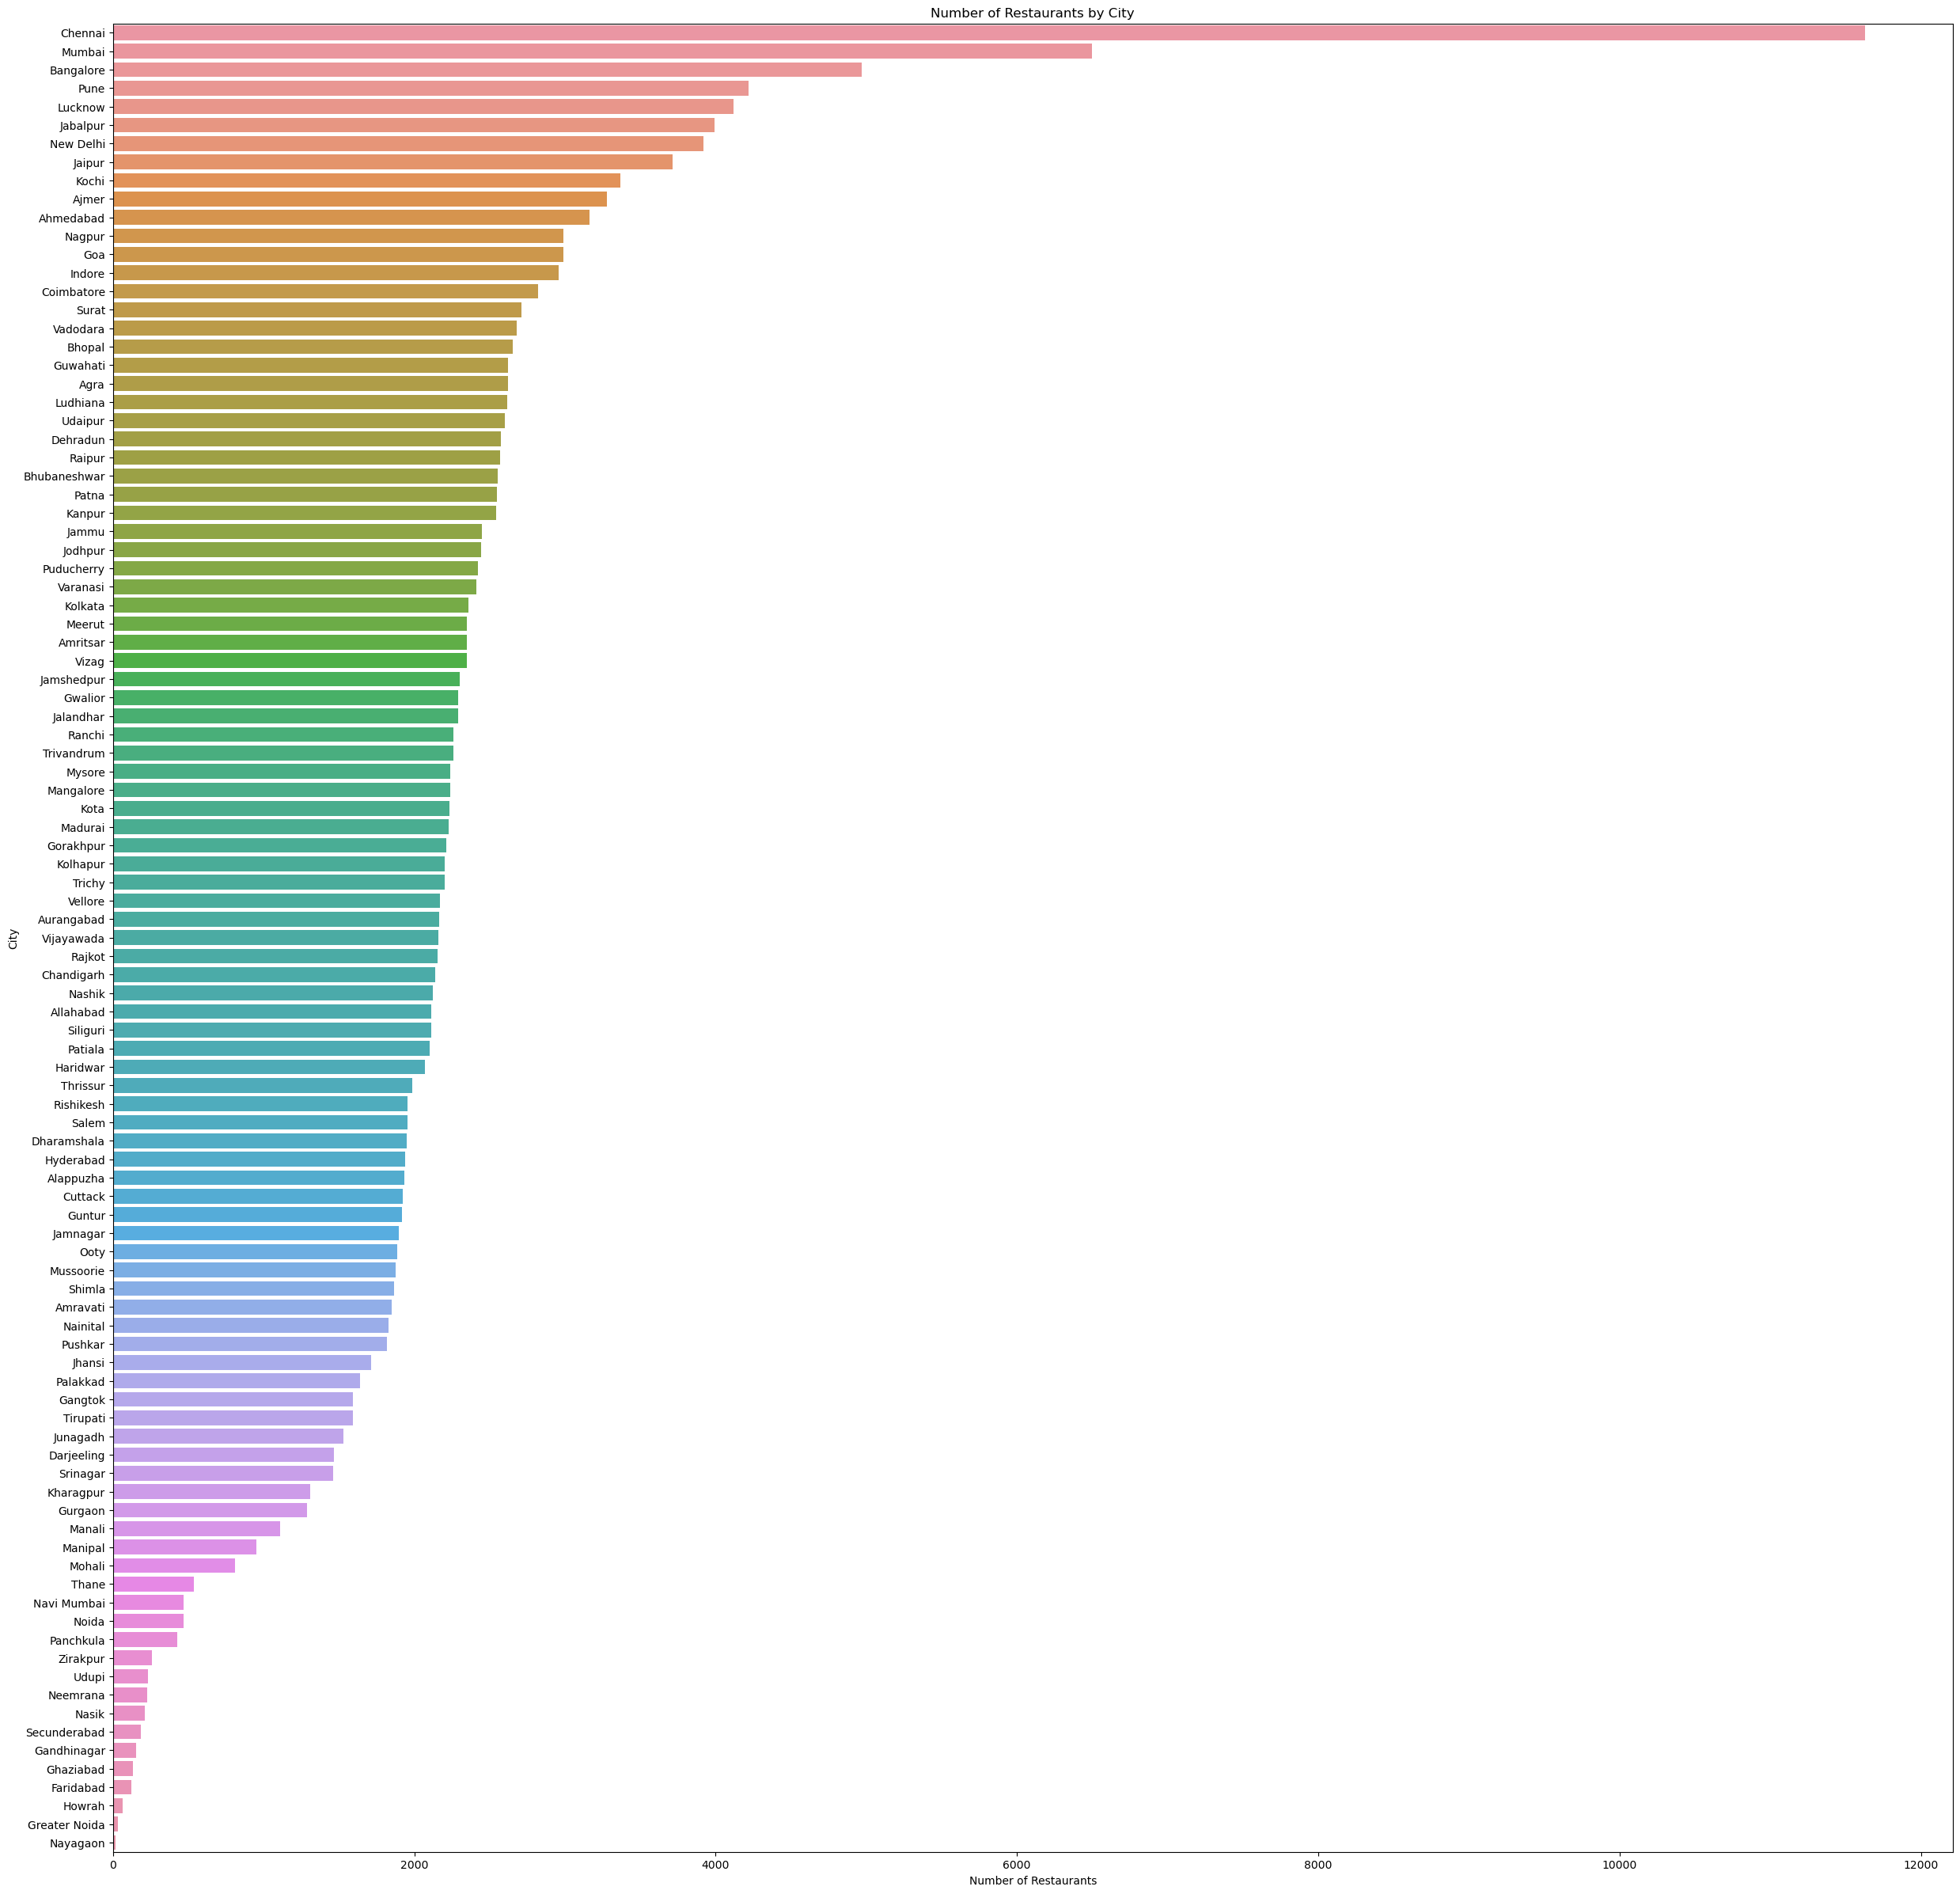

In [22]:
city_counts = df['city'].value_counts()
plt.figure(figsize=(30, 30))
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Number of Restaurants by City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

In [23]:
df_agra = df[df['city'] == 'Agra']
agra_cuisines = df_agra['cuisines'].value_counts()
print(agra_cuisines)

cuisines
[North Indian]                                          340
[Fast Food]                                              85
[North Indian, Chinese, Continental]                     76
[North Indian, Mughlai]                                  74
[Street Food]                                            70
                                                       ... 
[Chinese, North Indian, South Indian]                     1
[Chinese, Momos]                                          1
[North Indian, Chinese, Mughlai, Continental]             1
[North Indian, South Indian, Continental, Fast Food]      1
[Fast Food, Continental]                                  1
Name: count, Length: 230, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


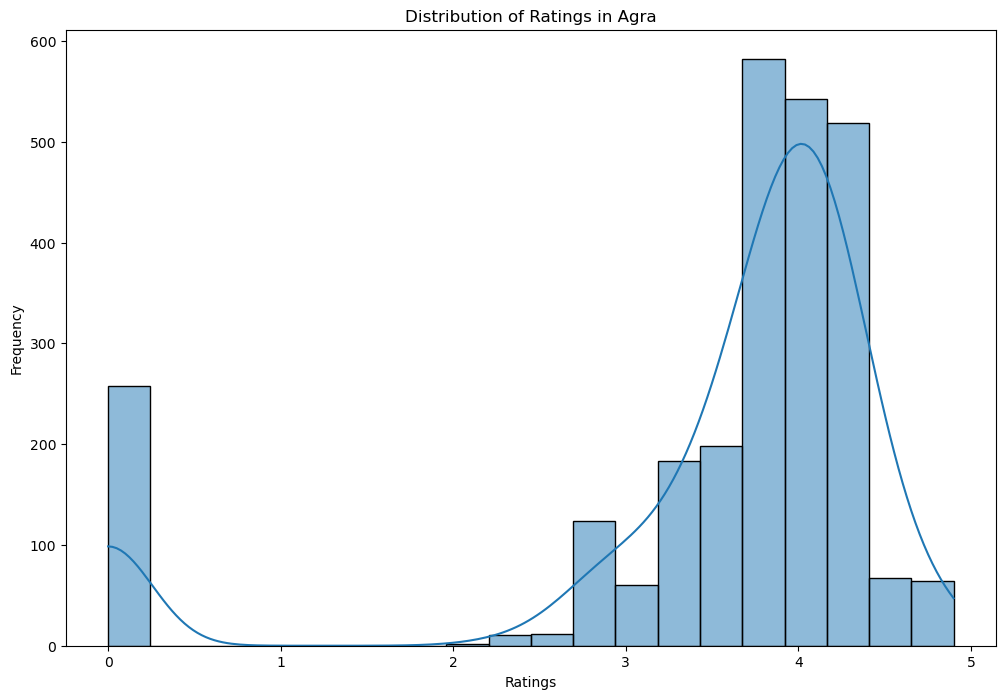

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(df_agra['aggregate_rating'], bins=20, kde=True)
plt.title('Distribution of Ratings in Agra')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [26]:
df['highlights'] = df['highlights'].apply(ast.literal_eval)
highlights_expanded = df.explode('highlights')
highlight_counts = highlights_expanded.groupby(['city', 'highlights']).size().unstack(fill_value=0)
print(highlight_counts)

highlights  4/5 Star  Above 18 Only  Air Conditioned  Alipay Accepted  \
city                                                                    
Agra              84             20             1287                0   
Ahmedabad         88              0             2206                0   
Ajmer              0             11             1243                0   
Alappuzha         33              2              526                0   
Allahabad          2              3             1201                0   
...              ...            ...              ...              ...   
Varanasi          66             33             1425                0   
Vellore           18             14              838                0   
Vijayawada        12             42             1260                0   
Vizag             89              2             1337                0   
Zirakpur          23              5              165                0   

highlights  All Day Breakfast  Available for Funct

In [29]:
# Relationship between restaurant ratings, price range, and popularity
correlation_matrix = df[['price_range', 'aggregate_rating', 'votes']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  price_range  aggregate_rating     votes
price_range          1.000000          0.252301  0.245050
aggregate_rating     0.252301          1.000000  0.271953
votes                0.245050          0.271953  1.000000


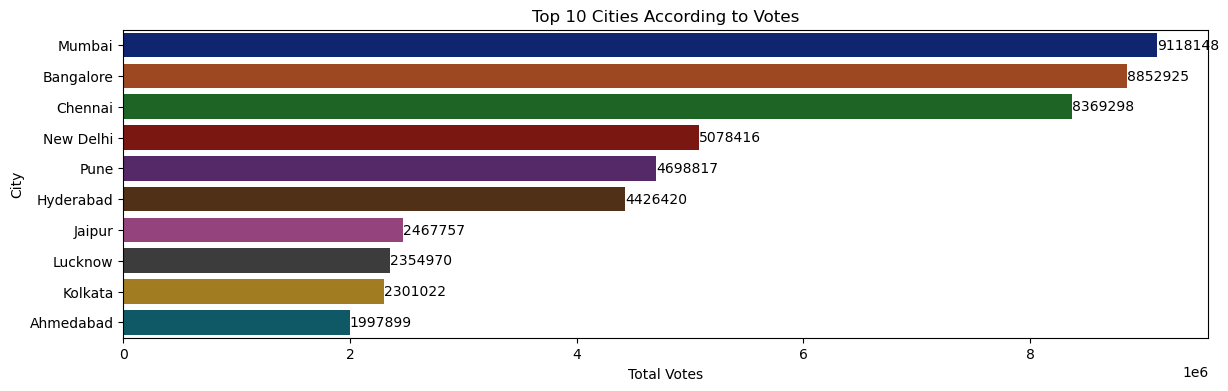

In [32]:
grouped_by_city = df.groupby('city')
total_votes_by_city = grouped_by_city['votes'].sum()
top_10_votes = total_votes_by_city.sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 4))
ax = sns.barplot(x=top_10_votes.values, y=top_10_votes.index, palette="dark")

for i, value in enumerate(top_10_votes.values):
    ax.text(value, i, f'{value}', va='center')

plt.title('Top 10 Cities According to Votes')
plt.xlabel('Total Votes')
plt.ylabel('City')
plt.show()

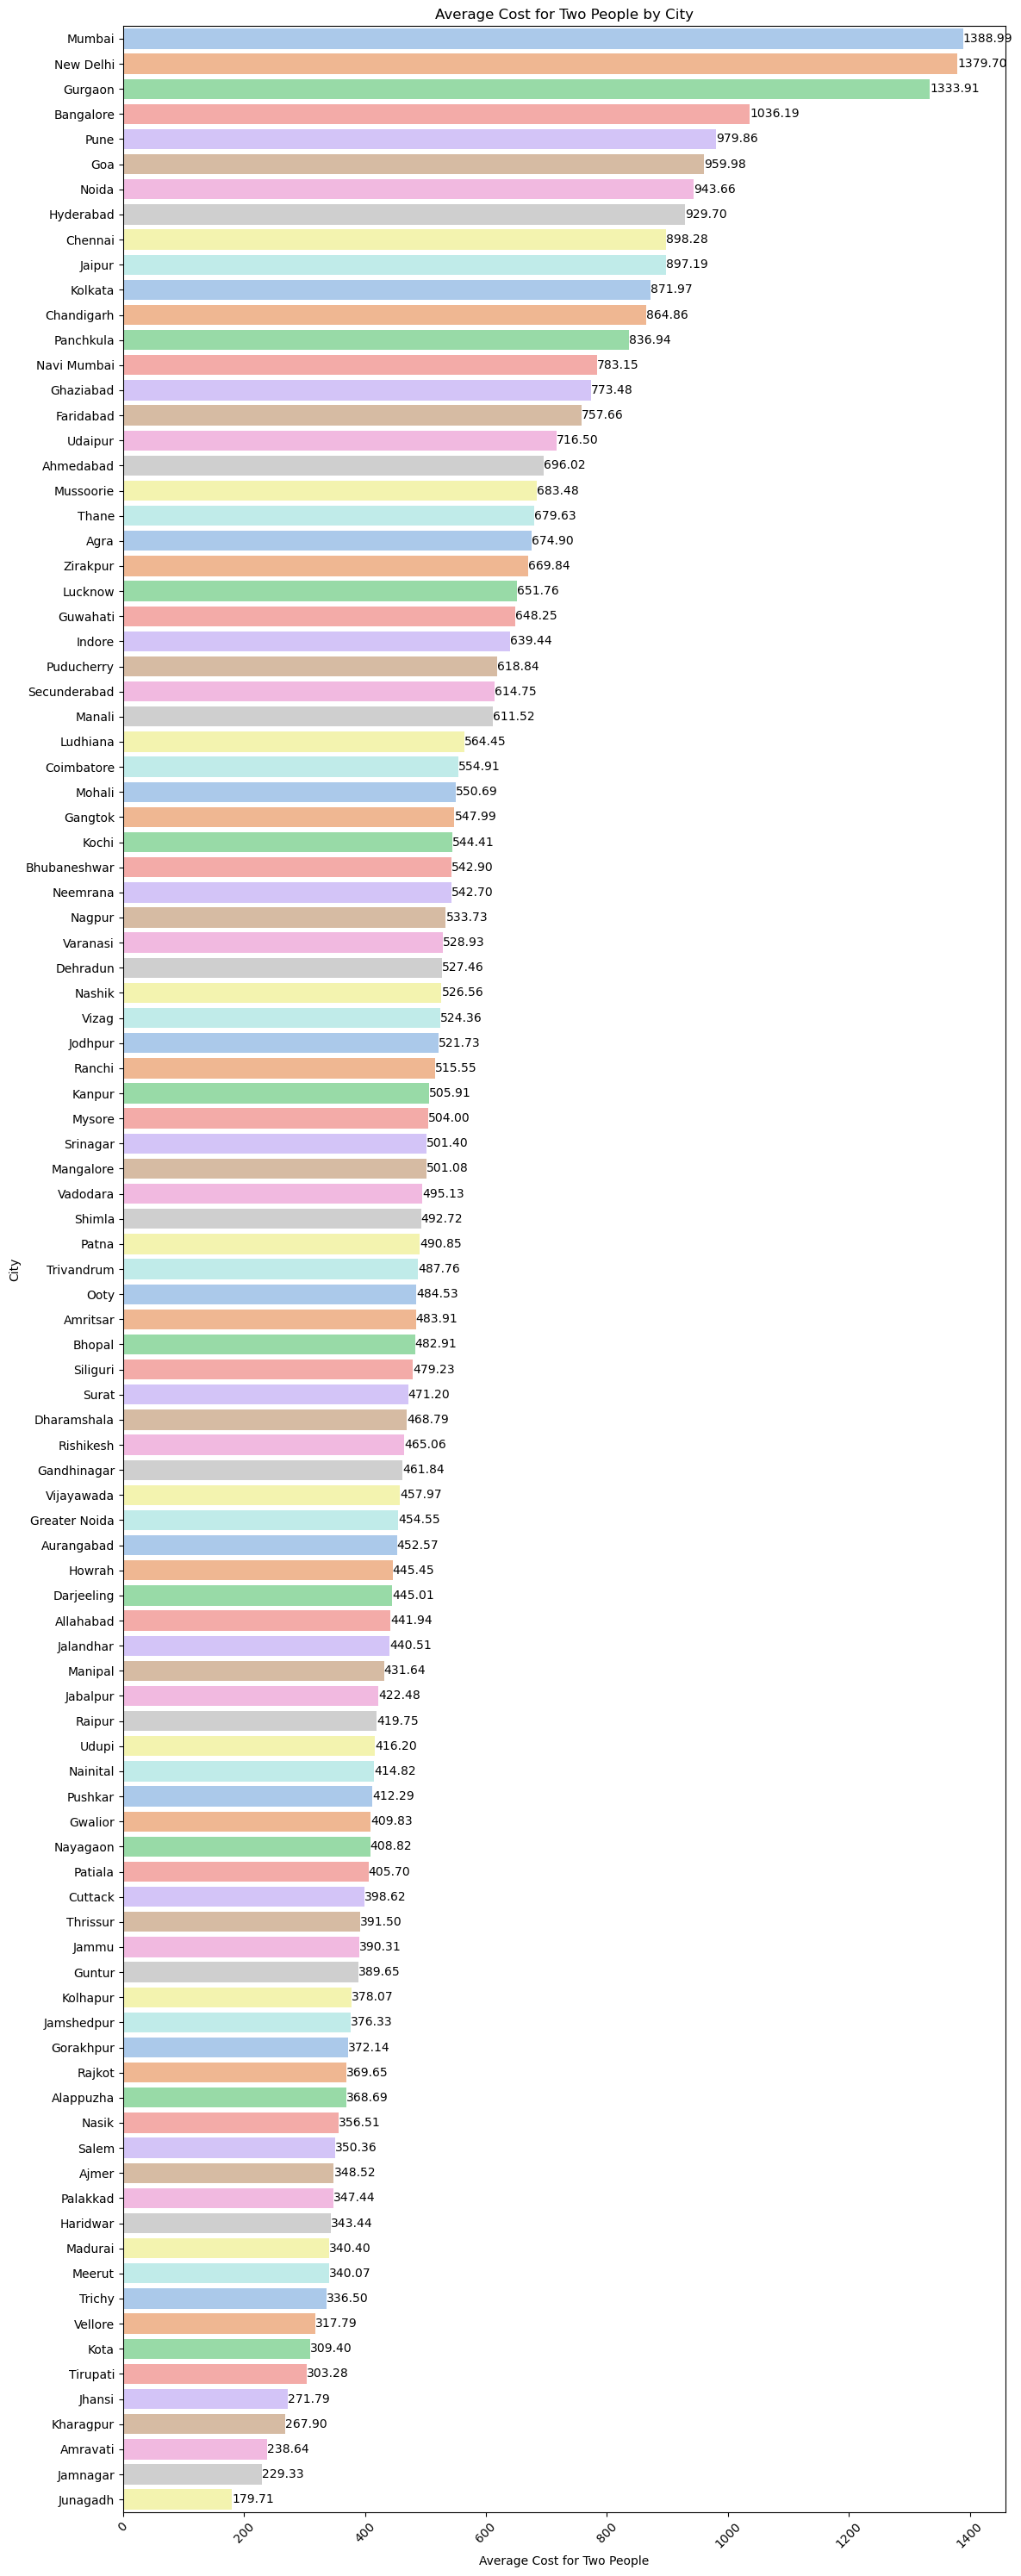

In [33]:
# The average cost for two people across different cities 
avg_cost_by_city = df.groupby('city')['average_cost_for_two'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 30))
sns.barplot(x='average_cost_for_two', y='city', data=avg_cost_by_city, palette='pastel')

plt.title('Average Cost for Two People by City')
plt.xlabel('Average Cost for Two People')
plt.ylabel('City')
plt.xticks(rotation=45)

for index, value in enumerate(avg_cost_by_city['average_cost_for_two']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.tight_layout()
plt.show()